# Exploratory Analysis

In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [16]:
# Load the dataframe
train_df = pd.read_csv('../../00_data/train_data.csv')
test_df = pd.read_csv('../../00_data/test_data.csv')
CLASS_NAMES = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [10]:
# Modify image paths
column_name = 'file_paths'  
train_df[column_name] = train_df[column_name].apply(lambda x: '../../' + x)
# Check the first few rows to verify the changes
print(train_df.head())  

                                          file_paths labels
0  ../../00_data/data/train/angry/Training_356688...  angry
1  ../../00_data/data/train/angry/Training_924397...  angry
2  ../../00_data/data/train/angry/Training_416346...  angry
3  ../../00_data/data/train/angry/Training_782609...  angry
4  ../../00_data/data/train/angry/Training_237367...  angry


### Data Visualization

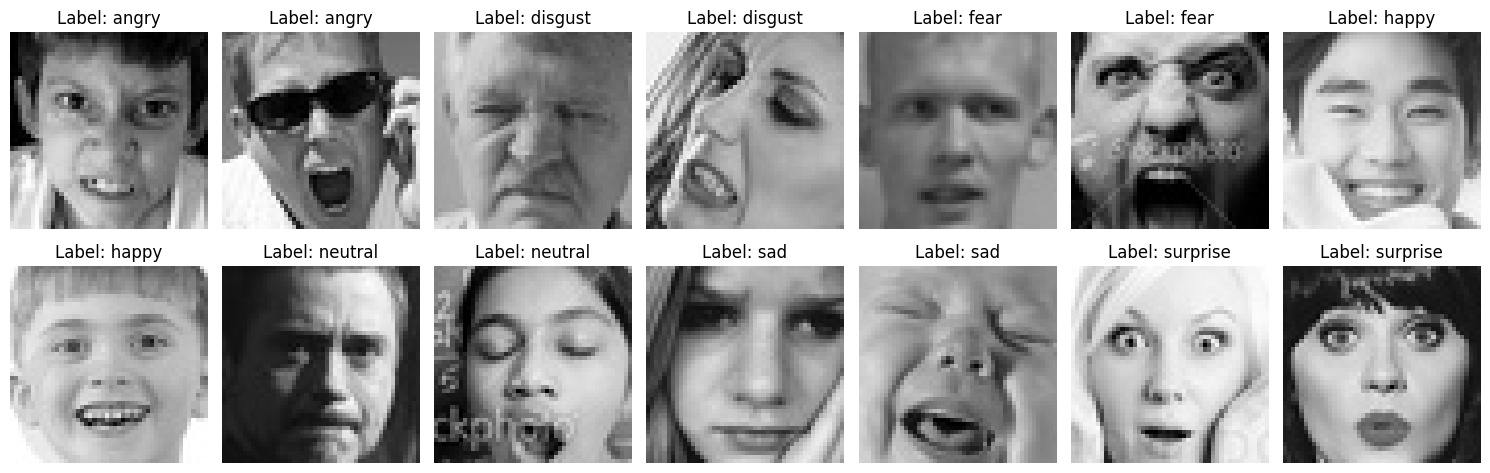

In [15]:
# Group dataframe by category and select two random rows for each category
selected_rows = train_df.groupby('labels').apply(lambda x: x.sample(2, random_state=42)).reset_index(drop=True)

# Create a 2x7 grid layout for displaying the images
num_rows = 2
num_cols = 7
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

# Iterate over the selected rows
for i, (_, row) in enumerate(selected_rows.iterrows()):
    # Get the image path and label from the row
    image_path = row['file_paths'] 
    label = row['labels']
    
    # Load the image using cv2
    img = cv2.imread(image_path)
    
    # Convert the image from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Calculate the position in the grid
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Display the image in the corresponding position in the grid
    axes[row_idx, col_idx].imshow(img_rgb)
    axes[row_idx, col_idx].set_title(f'Label: {label}')
    axes[row_idx, col_idx].axis('off') 

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()


### Distribution of Labels

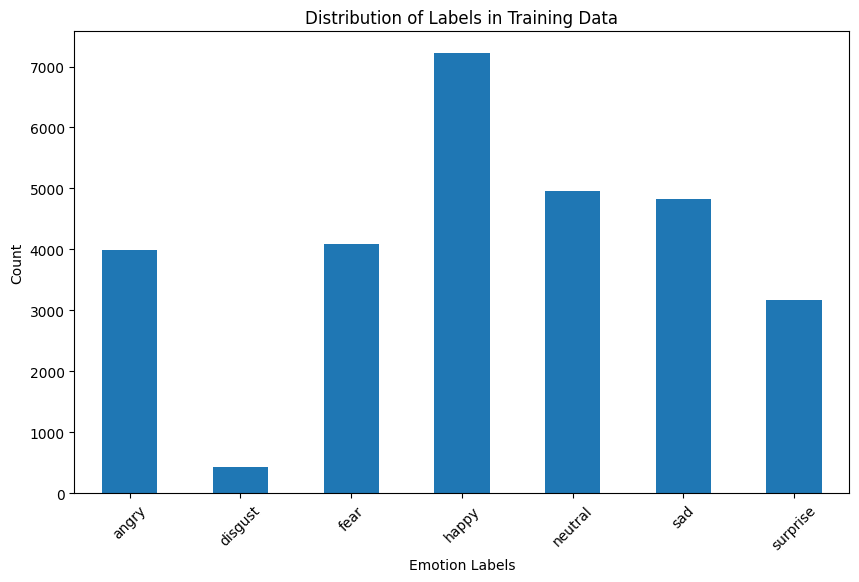

In [17]:
# Plot distribution of labels
plt.figure(figsize=(10, 6))
train_df['labels'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Labels in Training Data')
plt.xlabel('Emotion Labels')
plt.ylabel('Count')
plt.xticks(ticks=range(len(CLASS_NAMES)), labels=CLASS_NAMES, rotation=45)
plt.show()